# Proyecto 1 - Miner√≠a de Datos

## Carga de Librer√≠as


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# Configuraci√≥n de estilo para visualizaci√≥n


In [2]:
#sns.set_style("whitegrid")
train_df = pd.read_csv("train.csv")

## Carga de Datos


In [3]:
print("Informaci√≥n general del dataset:")
train_df.info()

print("\nResumen estad√≠stico:")
print(train_df.describe())

Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    146

## An√°lisis de Valores Nulos


In [4]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nValores nulos por columna:")
print(missing_values)


Valores nulos por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


## Tratamiento de Valores Nulos


In [5]:
# Llenar valores nulos en variables categ√≥ricas con "None"
categorical_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                        "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
# Llenar valores nulos en variables categ√≥ricas con "None"
train_df[categorical_features] = train_df[categorical_features].fillna("None")

numerical_features = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

# Llenar valores nulos en variables num√©ricas con la mediana
train_df[numerical_features] = train_df[numerical_features].apply(lambda x: x.fillna(x.median()))
    


## Transformaci√≥n de Datos

In [6]:
# Aplicar logaritmo al precio de venta para normalizar
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Convertir variables categ√≥ricas en num√©ricas con Label Encoding de forma vectorizada
label_encoders = {col: LabelEncoder().fit(train_df[col]) for col in categorical_features}
train_df[categorical_features] = train_df[categorical_features].apply(lambda col: label_encoders[col.name].transform(col))


## An√°lisis de Correlaci√≥n


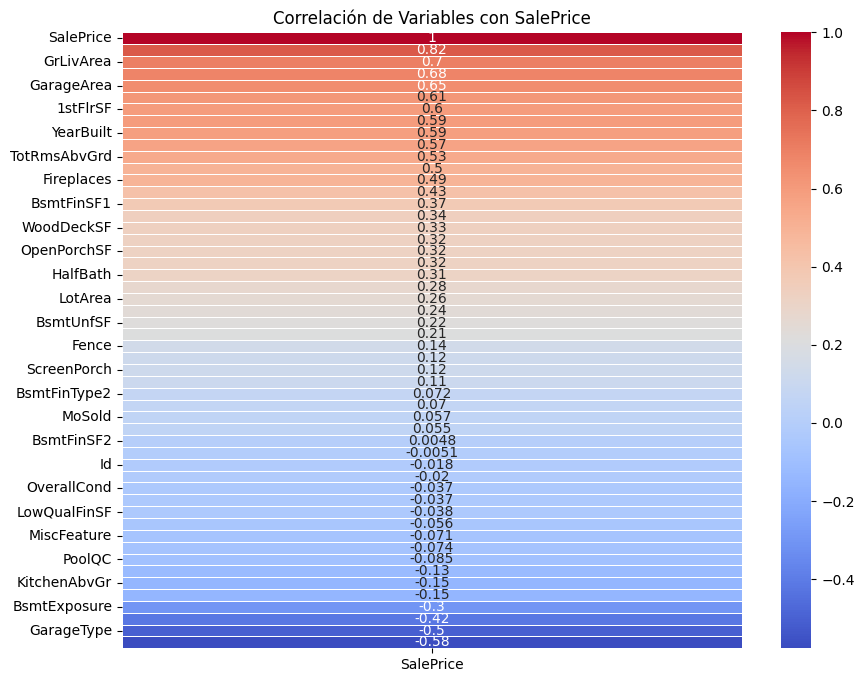

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = train_df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlaci√≥n de Variables con SalePrice")
plt.show()

In [8]:
correlation_threshold = 0.5
strong_corr_vars = corr_matrix["SalePrice"].abs().sort_values(ascending=False)
strong_corr_vars = strong_corr_vars[strong_corr_vars > correlation_threshold]
print("Variables con mayor correlaci√≥n con SalePrice:")
print(strong_corr_vars)

Variables con mayor correlaci√≥n con SalePrice:
SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
BsmtQual        0.576969
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
GarageType      0.503129
Name: SalePrice, dtype: float64


## An√°lisis de Clustering (K-Means y DBSCAN)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

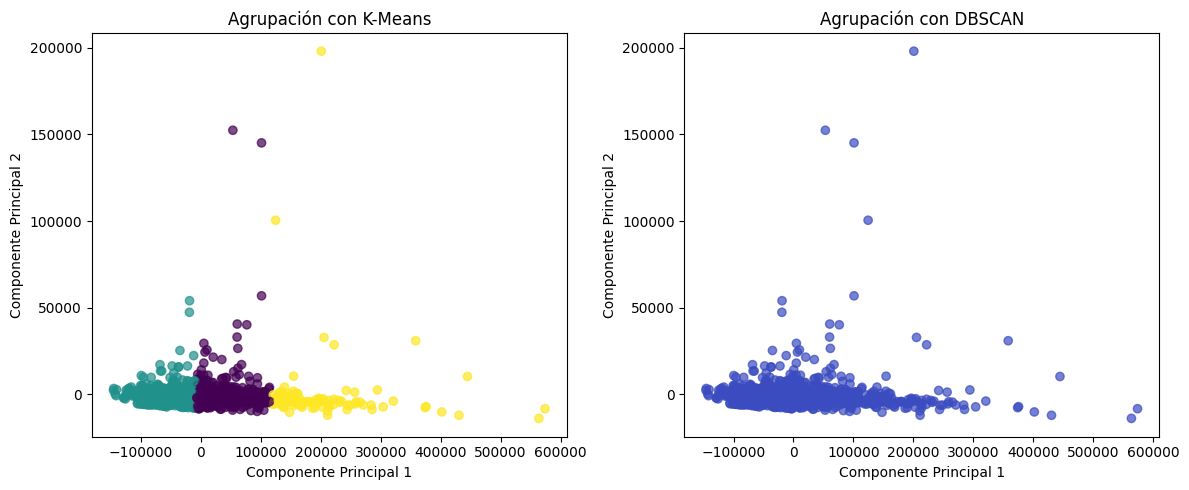

In [9]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


# Carga del dataset
df = pd.read_csv("train.csv")  # Aseg√∫rate de que el archivo "train.csv" est√° en la misma carpeta
print(df.head())  # Muestra las primeras filas para verificar que los datos est√°n cargados


# Seleccionar variables relevantes para el clustering
features_for_clustering = df[['LotArea', 'GrLivArea', 'SalePrice']]

# Aplicar PCA para reducir la dimensionalidad y visualizar los datos
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(features_pca)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(features_pca)

# Visualizaci√≥n de Clustering con K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.title('Agrupaci√≥n con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Visualizaci√≥n de Clustering con DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_dbscan, cmap='coolwarm', alpha=0.7)
plt.title('Agrupaci√≥n con DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()


## Divisi√≥n de Datos en Entrenamiento y Prueba


In [10]:
X = train_df.drop(columns=["SalePrice", "Id"])
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tama√±o de los conjuntos de datos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")



Tama√±o de los conjuntos de datos:
Entrenamiento: (1168, 79), Prueba: (292, 79)


In [11]:
categorical_features = X_train.select_dtypes(include=['object']).columns

column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)],
    remainder='passthrough' 
)

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

print("Preprocesamiento completado")

Preprocesamiento completado


# An√°lisis de relaciones con la variable respuesta

### An√°lisis de Relaci√≥n con Gr√°ficos de Dispersi√≥n

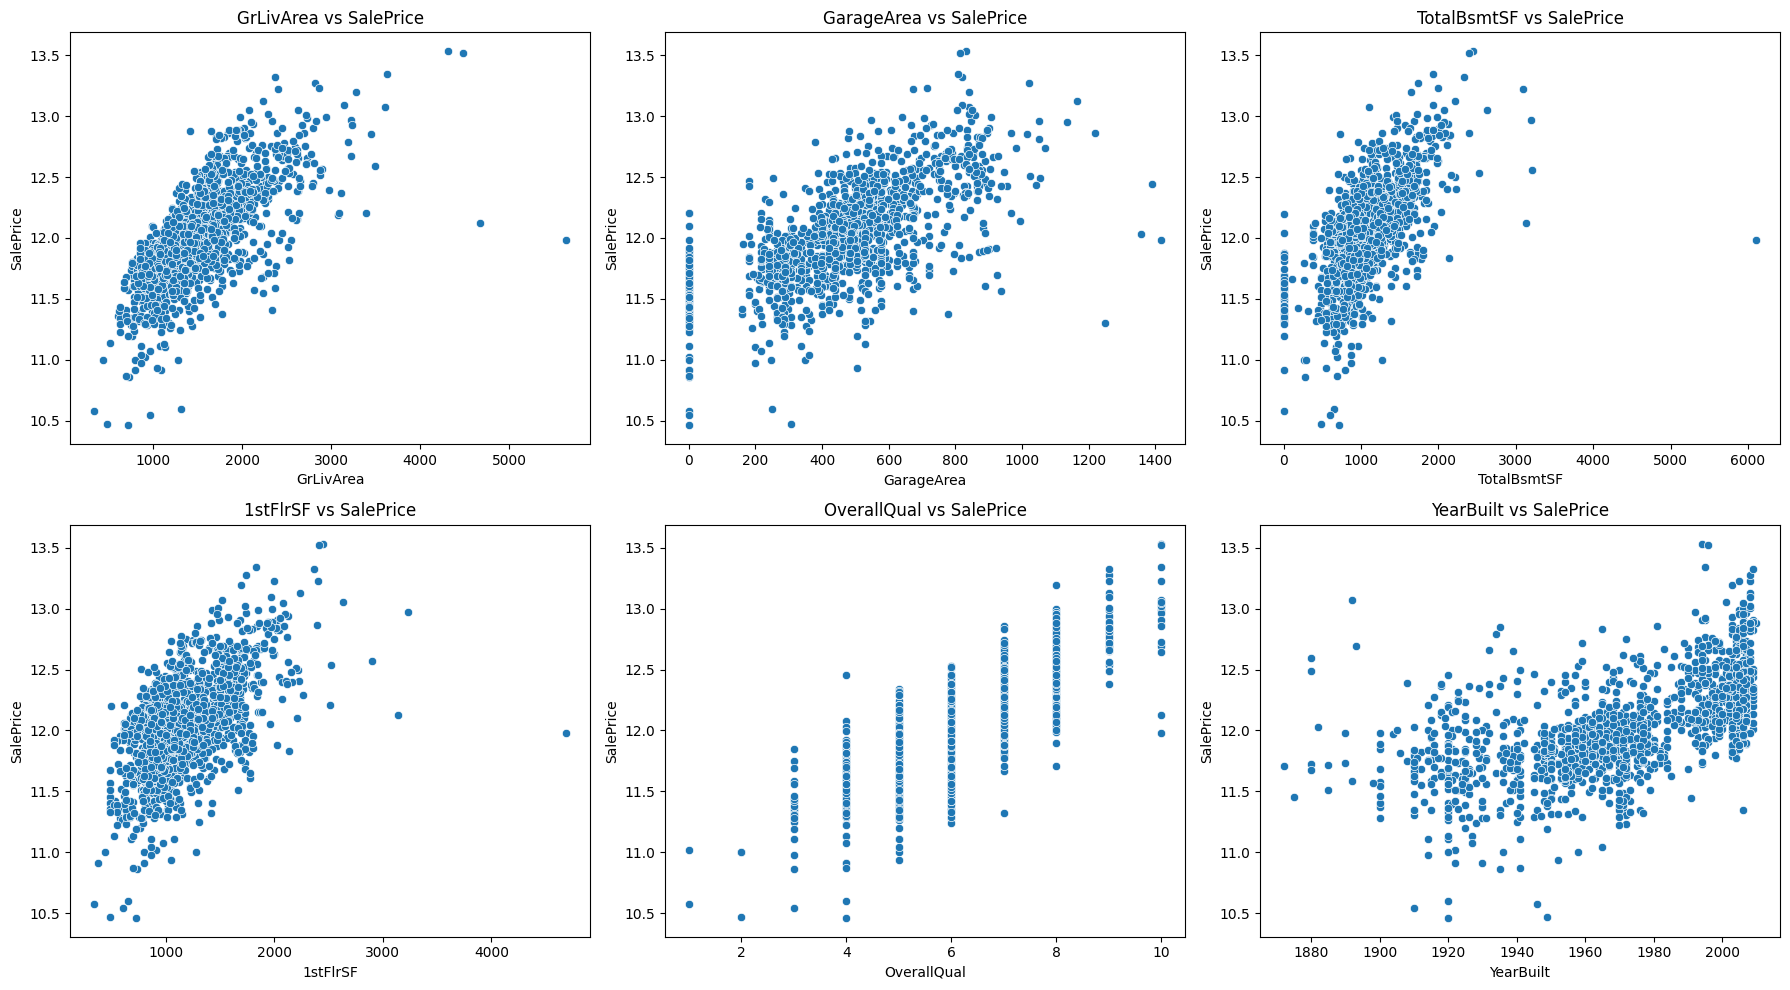

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Convierte la matriz de ejes en una lista

top_vars = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "OverallQual", "YearBuilt"]

for var, ax in zip(top_vars, axes):
    sns.scatterplot(x=train_df[var], y=train_df["SalePrice"], ax=ax)
    ax.set_title(f"{var} vs SalePrice")

plt.tight_layout()
plt.show()


### An√°lisis de Relaci√≥n con Boxplots

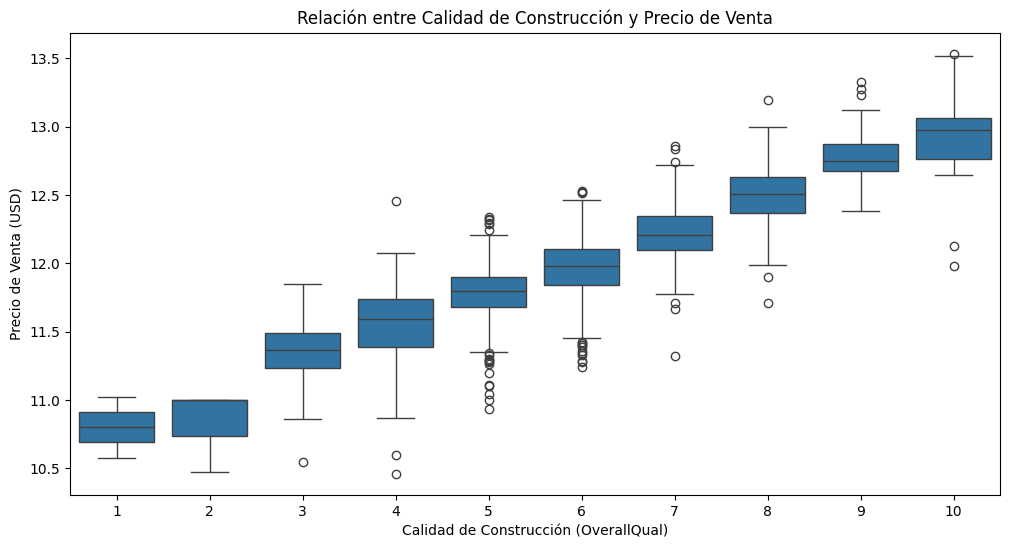

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df["OverallQual"], y=train_df["SalePrice"])
plt.xlabel("Calidad de Construcci√≥n (OverallQual)")
plt.ylabel("Precio de Venta (USD)")
plt.title("Relaci√≥n entre Calidad de Construcci√≥n y Precio de Venta")
plt.show()

### Regresi√≥n Lineal para evaluar impacto de variables

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Separar variables num√©ricas y categ√≥ricas
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocesador: Escalar num√©ricas y transformar categ√≥ricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Crear pipeline con preprocesamiento y regresi√≥n lineal
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regression", LinearRegression())
])

# Entrenar modelo
pipeline.fit(X, y)

# Obtener coeficientes de regresi√≥n
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
coef_dict = dict(zip(feature_names, pipeline.named_steps["regression"].coef_))

# Imprimir coeficientes
print("\nCoeficientes de la regresi√≥n lineal:")
for var, coef in coef_dict.items():
    print(f"{var}: {coef:.2f}")



Coeficientes de la regresi√≥n lineal:
num__MSSubClass: -0.02
num__LotFrontage: 0.01
num__LotArea: 0.03
num__Alley: 0.00
num__OverallQual: 0.06
num__OverallCond: 0.04
num__YearBuilt: 0.05
num__YearRemodAdd: 0.02
num__MasVnrArea: 0.00
num__BsmtQual: -0.01
num__BsmtCond: 0.00
num__BsmtExposure: -0.01
num__BsmtFinType1: -0.00
num__BsmtFinSF1: 0.03
num__BsmtFinType2: 0.00
num__BsmtFinSF2: 0.01
num__BsmtUnfSF: -0.00
num__TotalBsmtSF: 0.03
num__1stFlrSF: 0.04
num__2ndFlrSF: 0.04
num__LowQualFinSF: 0.01
num__GrLivArea: 0.07
num__BsmtFullBath: 0.02
num__BsmtHalfBath: 0.00
num__FullBath: 0.01
num__HalfBath: 0.01
num__BedroomAbvGr: 0.00
num__KitchenAbvGr: -0.01
num__TotRmsAbvGrd: 0.01
num__Fireplaces: 0.01
num__FireplaceQu: 0.00
num__GarageType: -0.00
num__GarageYrBlt: -0.01
num__GarageFinish: -0.00
num__GarageCars: 0.01
num__GarageArea: 0.03
num__GarageQual: 0.00
num__GarageCond: 0.00
num__WoodDeckSF: 0.01
num__OpenPorchSF: 0.00
num__EnclosedPorch: 0.01
num__3SsnPorch: 0.00
num__ScreenPorch: 0.

### √Årbol de Decisi√≥n para relaciones no lineales

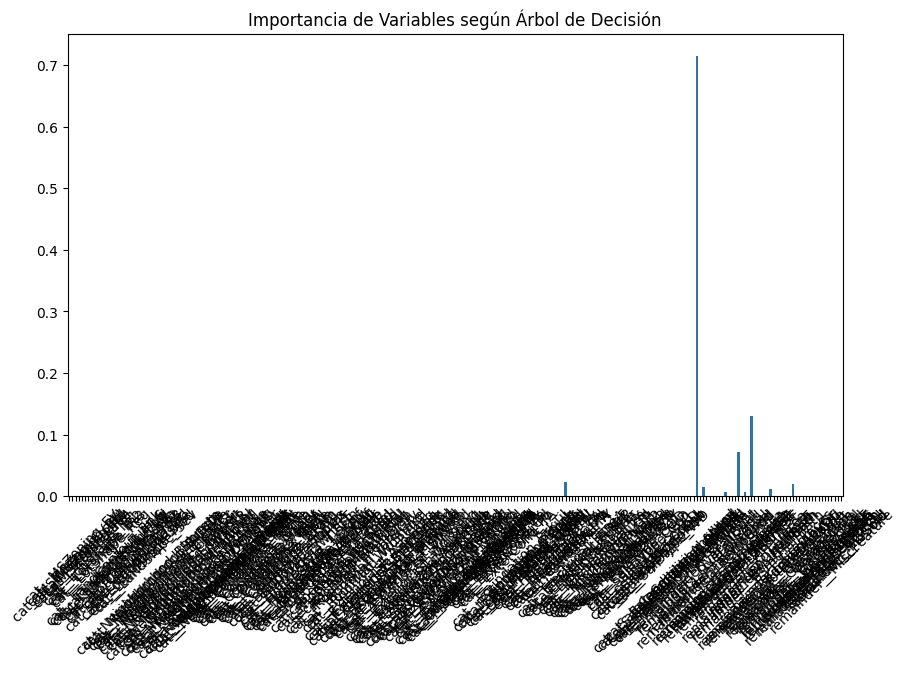

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Separar variables num√©ricas y categ√≥ricas
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Aplicar OneHotEncoder a las variables categ√≥ricas
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
], remainder="passthrough")  # Mantener las variables num√©ricas sin cambios

# Transformar X para que todas las variables sean num√©ricas
X_transformed = preprocessor.fit_transform(X)

# Entrenar el √Årbol de Decisi√≥n con las variables transformadas
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_transformed, y)

# Obtener nombres de las variables despu√©s del OneHotEncoder
feature_names = preprocessor.get_feature_names_out()

# Visualizar la importancia de las caracter√≠sticas
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=tree.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importancia de Variables seg√∫n √Årbol de Decisi√≥n")
plt.show()


In [16]:

# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el dataset
train_df = pd.read_csv("train.csv")

# Rellenar valores nulos en variables num√©ricas con la mediana
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df[numerical_features] = train_df[numerical_features].fillna(train_df[numerical_features].median())

# Excluir la variable objetivo "SalePrice" del an√°lisis de VIF
numerical_features.remove("SalePrice")

# Calcular el Variance Inflation Factor (VIF) para cada variable num√©rica
X = train_df[numerical_features]
X = sm.add_constant(X)  # Agregar constante para el modelo

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el an√°lisis de multicolinealidad
display(vif_data)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, train_df["SalePrice"], test_size=0.2, random_state=42)

# Entrenar modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Calcular m√©tricas de error
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Comparaci√≥n de errores para detectar sobreajuste
error_comparison = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba"],
    "RMSE": [train_rmse, test_rmse],
    "MAE": [train_mae, test_mae],
    "R¬≤": [train_r2, test_r2]
})

display(error_comparison)

# Evaluaci√≥n de modelos en el conjunto de prueba
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train, y_train)
y_test_pred_arbol = modelo_arbol.predict(X_test)

# Comparaci√≥n de modelos
model_comparison = pd.DataFrame({
    "Modelo": ["Regresi√≥n Lineal", "√Årbol de Decisi√≥n"],
    "RMSE": [test_rmse, np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))],
    "MAE": [test_mae, mean_absolute_error(y_test, y_test_pred_arbol)],
    "R¬≤": [test_r2, r2_score(y_test, y_test_pred_arbol)]
})

display(model_comparison)

# Cargar el conjunto de datos de prueba
test_df = pd.read_csv("test.csv")

# Asegurar que todas las columnas de prueba coincidan con las de entrenamiento
X_final_test = test_df[numerical_features].fillna(train_df[numerical_features].median())

# Agregar la constante "const" como en el entrenamiento
X_final_test = sm.add_constant(X_final_test, has_constant="add")

# Realizar la predicci√≥n final
test_df["SalePrice_Predicted"] = modelo.predict(X_final_test)

# Guardar el resultado en un archivo CSV
test_df[["Id", "SalePrice_Predicted"]].to_csv("predicciones_finales.csv", index=False)

# Mostrar las primeras filas de las predicciones
display(test_df[["Id", "SalePrice_Predicted"]])



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variable           VIF
0           const  2.416497e+06
1              Id  1.026945e+00
2      MSSubClass  1.657272e+00
3     LotFrontage  1.568471e+00
4         LotArea  1.255983e+00
5     OverallQual  3.264369e+00
6     OverallCond  1.596944e+00
7       YearBuilt  5.008877e+00
8    YearRemodAdd  2.425908e+00
9      MasVnrArea  1.394015e+00
10     BsmtFinSF1           inf
11     BsmtFinSF2           inf
12      BsmtUnfSF           inf
13    TotalBsmtSF           inf
14       1stFlrSF           inf
15       2ndFlrSF           inf
16   LowQualFinSF           inf
17      GrLivArea           inf
18   BsmtFullBath  2.219862e+00
19   BsmtHalfBath  1.153241e+00
20       FullBath  2.951727e+00
21       HalfBath  2.168018e+00
22   BedroomAbvGr  2.329373e+00
23   KitchenAbvGr  1.597388e+00
24   TotRmsAbvGrd  4.889900e+00
25     Fireplaces  1.585984e+00
26    GarageYrBlt  3.314130e+00
27     GarageCars  5.586220e+00
28     GarageArea  5.460000e+00
29     WoodDeckSF  1.220581e+00
30    OpenPorchSF  1.222736e+00
31  EnclosedPorch  1.283853e+00
32      3SsnPorch  1.025865e+00
33    ScreenPorch  1.110277e+00
34       PoolArea  1.110201e+00
35        MiscVal  1.023410e+00
36         MoSold  1.050896e+00
37         YrSold  1.052044e+00

Conjunto          RMSE           MAE        R¬≤
0  Entrenamiento  33907.325191  21073.200082  0.807243
1         Prueba  36879.819322  23000.028866  0.822678

Modelo          RMSE           MAE        R¬≤
0   Regresi√≥n Lineal  36879.819322  23000.028866  0.822678
1  √Årbol de Decisi√≥n  40272.116165  27587.554795  0.788556

Id  SalePrice_Predicted
0     1461        114107.857536
1     1462        145821.139603
2     1463        171236.243060
3     1464        196886.739389
4     1465        195832.330468
...    ...                  ...
1454  2915         53318.665620
1455  2916         62473.236437
1456  2917        161277.296022
1457  2918         92344.814687
1458  2919        246477.469591

[1459 rows x 2 columns]

# Segunda Entrega
### Librer√≠as a utilizar

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Cargar el conjunto de datos

In [18]:
train_df = pd.read_csv("train.csv")

#### Preprocesamiento 

In [19]:
categorical_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
                          "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                          "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

train_df[categorical_features] = train_df[categorical_features].fillna("None")

numerical_features = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]
train_df[numerical_features] = train_df[numerical_features].apply(lambda x: x.fillna(x.median()))

# Transformar el precio de venta con logaritmo para normalizar la distribuci√≥n
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Convertir variables categ√≥ricas a num√©ricas mediante Label Encoding
label_encoders = {col: LabelEncoder().fit(train_df[col]) for col in categorical_features}
train_df[categorical_features] = train_df[categorical_features].apply(lambda col: label_encoders[col.name].transform(col))


### 2. Separar el conjunto de datos en entrenamiento y prueba.

In [20]:
# Definimos X eliminando 'Id' y 'SalePrice'
X = train_df.drop(columns=["Id", "SalePrice"])
y = train_df["SalePrice"]

# Convertir todas las variables categ√≥ricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. √Årbol de regresi√≥n

In [21]:
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Usar el modelo para predecir en el conjunto de prueba
y_pred = reg_tree.predict(X_test)

# Evaluar el desempe√±o del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Desempe√±o del √°rbol de regresi√≥n:")
print("RMSE:", rmse)
print("R¬≤:", r2)

Desempe√±o del √°rbol de regresi√≥n:
RMSE: 0.1911380373110358
R¬≤: 0.8042250910123396


### 4.Desarrollen, al menos, 3 modelos m√°s, cambiando el par√°metro de la profundidad del √°rbol.
¬øCu√°l es el mejor modelo para predecir el precio de las casas?

In [22]:
# Seleccionar las caracter√≠sticas y la variable objetivo
X = train_df.drop(columns=['SalePrice'])  # Variables predictoras
y = train_df['SalePrice']  # Variable objetivo

# Convertir variables categ√≥ricas en num√©ricas
X = pd.get_dummies(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Actividad 4: Entrenar √°rboles de regresi√≥n con diferentes profundidades
depths = [3, 6, 10]
models = {}
results = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    models[depth] = model
    results[depth] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Seleccionar el mejor modelo basado en R2
best_depth = max(results, key=lambda d: results[d]['R2'])
best_model = models[best_depth]

print(f"Mejor profundidad: {best_depth}, R2: {results[best_depth]['R2']}")

Mejor profundidad: 10, R2: 0.7918606416521997


5. Comparen los resultados con el modelo de regresi√≥n lineal de la hoja anterior, ¬øcu√°l lo hizo
mejor?

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
print(f"R2 de Regresi√≥n Lineal: {r2_lin}")
print(f"R2 del Mejor √Årbol de Regresi√≥n (profundidad={best_depth}): {results[best_depth]['R2']}")

R2 de Regresi√≥n Lineal: 0.9131963705233864
R2 del Mejor √Årbol de Regresi√≥n (profundidad=10): 0.7918606416521997


### 6.Dependiendo del an√°lisis exploratorio elaborado creen una variable respuesta que les permita clasificar las casas en Econ√≥micas, Intermedias o Caras. Los l√≠mites de estas clases deben tener un fundamento en la distribuci√≥n de los datos de precios, y estar bien explicados 

Distribuci√≥n de categor√≠as de precios:
Cara: 497 casas (34.0%)
Econ√≥mica: 483 casas (33.1%)
Intermedia: 480 casas (32.9%)


C:\Users\user\AppData\Local\Temp\ipykernel_27680\4166350755.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PriceCategory', y='SalePrice', data=train_df,
C:\Users\user\AppData\Local\Temp\ipykernel_27680\4166350755.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='PriceCategory', data=train_df,


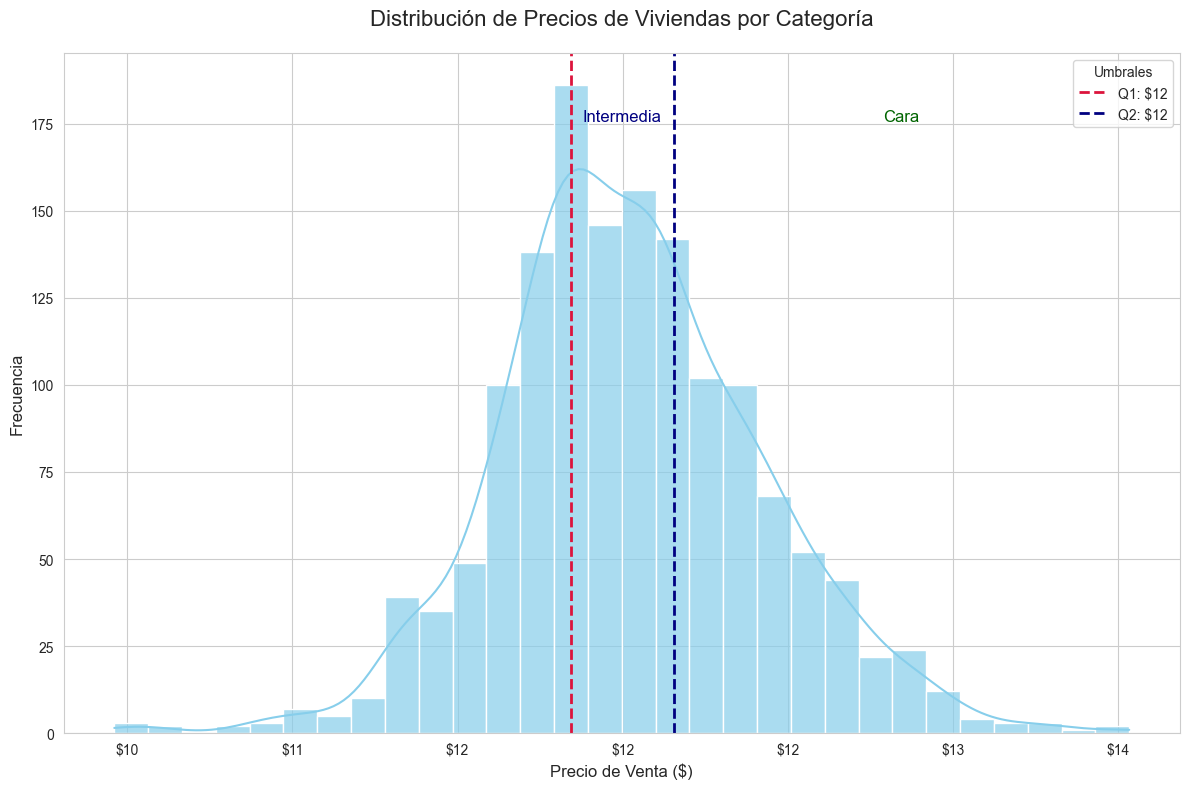

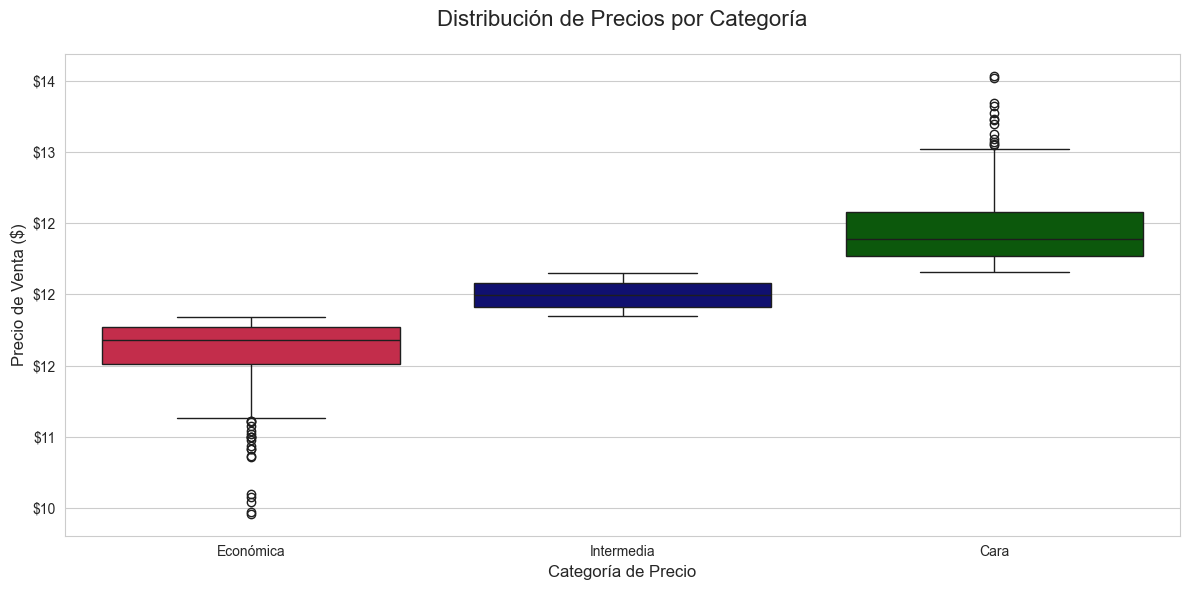

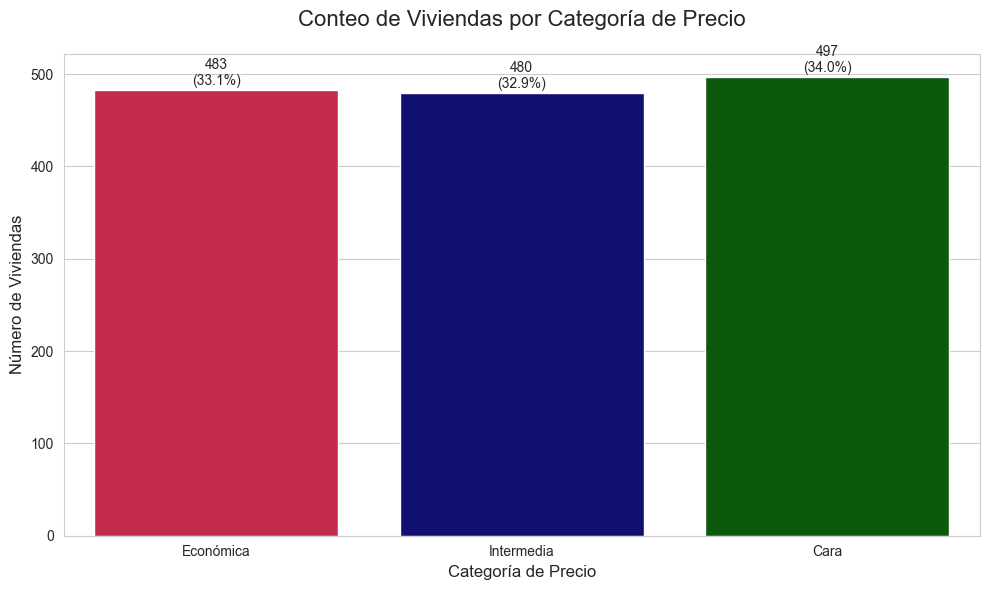

In [24]:
from matplotlib.ticker import FuncFormatter


# Definir cuantiles para categorizaci√≥n
y = train_df['SalePrice']  # Aseg√∫rate de que esta columna existe en tu DataFrame

# Definir cuantiles para categorizaci√≥n (usando numpy para mayor precisi√≥n)
q1 = np.percentile(y, 33)
q2 = np.percentile(y, 66)

def categorizar_precio(precio):
    if precio <= q1:
        return 'Econ√≥mica'
    elif precio <= q2:
        return 'Intermedia'
    else:
        return 'Cara'

# Aplicar categorizaci√≥n
train_df['PriceCategory'] = train_df['SalePrice'].apply(categorizar_precio)

# Mostrar distribuci√≥n de las categor√≠as con porcentajes
category_counts = train_df['PriceCategory'].value_counts()
total = len(train_df)
print("Distribuci√≥n de categor√≠as de precios:")
for category, count in category_counts.items():
    percentage = count / total * 100
    print(f"{category}: {count} casas ({percentage:.1f}%)")

# Configurar el estilo de visualizaci√≥n
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Crear una visualizaci√≥n m√°s informativa
# Histograma principal
ax = sns.histplot(train_df['SalePrice'], bins=30, kde=True, alpha=0.7, color='skyblue')

# A√±adir l√≠neas de cuantiles m√°s visibles
plt.axvline(q1, color='crimson', linestyle='dashed', linewidth=2, label=f"Q1: ${q1:,.0f}")
plt.axvline(q2, color='navy', linestyle='dashed', linewidth=2, label=f"Q2: ${q2:,.0f}")

# A√±adir etiquetas para cada categor√≠a
plt.annotate('Econ√≥mica', xy=(q1/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='crimson')
plt.annotate('Intermedia', xy=((q1+q2)/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='navy')
plt.annotate('Cara', xy=((q2+max(y))/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='darkgreen')

# Formatear eje X para mostrar precios en formato de moneda
def format_precio(x, pos):
    return f'${x:,.0f}'

ax.xaxis.set_major_formatter(FuncFormatter(format_precio))

# Mejorar la apariencia general
plt.title("Distribuci√≥n de Precios de Viviendas por Categor√≠a", fontsize=16, pad=20)
plt.xlabel("Precio de Venta ($)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Umbrales", fontsize=10)
plt.tight_layout()

# Segunda visualizaci√≥n: boxplot por categor√≠a
plt.figure(figsize=(12, 6))
sns.boxplot(x='PriceCategory', y='SalePrice', data=train_df, 
            order=['Econ√≥mica', 'Intermedia', 'Cara'], 
            palette=['crimson', 'navy', 'darkgreen'])
plt.title("Distribuci√≥n de Precios por Categor√≠a", fontsize=16, pad=20)
plt.xlabel("Categor√≠a de Precio", fontsize=12)
plt.ylabel("Precio de Venta ($)", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_precio))
plt.tight_layout()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PriceCategory', data=train_df, 
              order=['Econ√≥mica', 'Intermedia', 'Cara'],
              palette=['crimson', 'navy', 'darkgreen'])

# A√±adir etiquetas con el conteo y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height)}\n({percentage:.1f}%)',
            ha='center', fontsize=10)

plt.title("Conteo de Viviendas por Categor√≠a de Precio", fontsize=16, pad=20)
plt.xlabel("Categor√≠a de Precio", fontsize=12)
plt.ylabel("N√∫mero de Viviendas", fontsize=12)
plt.tight_layout()

# Mostrar todos los gr√°ficos
plt.show()

### 7.Elaboren un √°rbol de clasificaci√≥n utilizando la variable respuesta que crearon en el punto anterior. Expliquen los resultados a los que llegaron. Muestren el modelo gr√°ficamente. Recuerden que la nueva variable respuesta es categ√≥rica, pero se gener√≥ a partir de los precios de las casas, no incluyan el precio de venta para entrenar el modelo.

In [25]:
# Importaciones necesarias (al principio del notebook)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.ticker import FuncFormatter
import pydotplus

# Primero, debes cargar los datos
# Aseg√∫rate de tener el archivo CSV o la fuente de datos correcta
# Ejemplo:
# train_df = pd.read_csv('house_prices_train.csv')

# Si no tienes el archivo, proporciona la ruta correcta a tus datos
# Por ejemplo:
# train_df = pd.read_csv('/ruta/a/tu/archivo.csv')

# PARTE 1: Categorizaci√≥n de precios
# Definir cuantiles para categorizaci√≥n
y = train_df['SalePrice']  # Aseg√∫rate de que esta columna existe en tu DataFrame

# Definir cuantiles para categorizaci√≥n (usando numpy para mayor precisi√≥n)
q1 = np.percentile(y, 33)
q2 = np.percentile(y, 66)

def categorizar_precio(precio):
    if precio <= q1:
        return 'Econ√≥mica'
    elif precio <= q2:
        return 'Intermedia'
    else:
        return 'Cara'

# Aplicar categorizaci√≥n
train_df['PriceCategory'] = train_df['SalePrice'].apply(categorizar_precio)

# Mostrar distribuci√≥n de las categor√≠as con porcentajes
category_counts = train_df['PriceCategory'].value_counts()
total = len(train_df)
print("Distribuci√≥n de categor√≠as de precios:")
for category, count in category_counts.items():
    percentage = count / total * 100
    print(f"{category}: {count} casas ({percentage:.1f}%)")

# Configurar el estilo de visualizaci√≥n
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Crear una visualizaci√≥n m√°s informativa
# Histograma principal
ax = sns.histplot(train_df['SalePrice'], bins=30, kde=True, alpha=0.7, color='skyblue')

# A√±adir l√≠neas de cuantiles m√°s visibles
plt.axvline(q1, color='crimson', linestyle='dashed', linewidth=2, label=f"Q1: ${q1:,.0f}")
plt.axvline(q2, color='navy', linestyle='dashed', linewidth=2, label=f"Q2: ${q2:,.0f}")

# A√±adir etiquetas para cada categor√≠a
plt.annotate('Econ√≥mica', xy=(q1/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='crimson')
plt.annotate('Intermedia', xy=((q1+q2)/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='navy')
plt.annotate('Cara', xy=((q2+max(y))/2, ax.get_ylim()[1]*0.9), 
             ha='center', fontsize=12, color='darkgreen')

# Formatear eje X para mostrar precios en formato de moneda
def format_precio(x, pos):
    return f'${x:,.0f}'

ax.xaxis.set_major_formatter(FuncFormatter(format_precio))

# Mejorar la apariencia general
plt.title("Distribuci√≥n de Precios de Viviendas por Categor√≠a", fontsize=16, pad=20)
plt.xlabel("Precio de Venta ($)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Umbrales", fontsize=10)
plt.tight_layout()

# Segunda visualizaci√≥n: boxplot por categor√≠a
plt.figure(figsize=(12, 6))
sns.boxplot(x='PriceCategory', y='SalePrice', data=train_df, 
            order=['Econ√≥mica', 'Intermedia', 'Cara'], 
            palette=['crimson', 'navy', 'darkgreen'])
plt.title("Distribuci√≥n de Precios por Categor√≠a", fontsize=16, pad=20)
plt.xlabel("Categor√≠a de Precio", fontsize=12)
plt.ylabel("Precio de Venta ($)", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_precio))
plt.tight_layout()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PriceCategory', data=train_df, 
              order=['Econ√≥mica', 'Intermedia', 'Cara'],
              palette=['crimson', 'navy', 'darkgreen'])

# A√±adir etiquetas con el conteo y porcentaje
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height)}\n({percentage:.1f}%)',
            ha='center', fontsize=10)

plt.title("Conteo de Viviendas por Categor√≠a de Precio", fontsize=16, pad=20)
plt.xlabel("Categor√≠a de Precio", fontsize=12)
plt.ylabel("N√∫mero de Viviendas", fontsize=12)
plt.tight_layout()

# Mostrar todos los gr√°ficos
plt.show()

# PARTE 2: Modelo de clasificaci√≥n
# Convertir etiquetas categ√≥ricas a n√∫meros
label_map = {'Econ√≥mica': 0, 'Intermedia': 1, 'Cara': 2}
reverse_label_map = {0: 'Econ√≥mica', 1: 'Intermedia', 2: 'Cara'}
train_df['PriceCategoryNum'] = train_df['PriceCategory'].map(label_map)

# Seleccionar las caracter√≠sticas y la variable objetivo
X_class = train_df.drop(columns=['SalePrice', 'PriceCategory', 'PriceCategoryNum'])

# Tratamiento mejorado de variables num√©ricas y categ√≥ricas
categorical_cols = X_class.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_class.select_dtypes(include=['int64', 'float64']).columns

# Imputar valores faltantes
for col in numerical_cols:
    X_class[col].fillna(X_class[col].median(), inplace=True)
    
for col in categorical_cols:
    X_class[col].fillna(X_class[col].mode()[0], inplace=True)

# Convertir variables categ√≥ricas en num√©ricas con manejo mejorado
X_class_encoded = pd.get_dummies(X_class, drop_first=True)  # drop_first reduce multicolinealidad

# Variable objetivo
y_class = train_df['PriceCategoryNum']

# Escalado de caracter√≠sticas num√©ricas para mejorar rendimiento
scaler = StandardScaler()
X_class_scaled = X_class_encoded.copy()
X_class_scaled[X_class_encoded.columns] = scaler.fit_transform(X_class_encoded)

# Dividir en conjunto de entrenamiento y prueba con estratificaci√≥n para mantener distribuci√≥n de clases
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Selecci√≥n de caracter√≠sticas importantes
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_class, y_train_class)

# Obtener caracter√≠sticas importantes
selected_features = X_train_class.columns[selector.get_support()]
print(f"Caracter√≠sticas seleccionadas ({len(selected_features)} de {X_train_class.shape[1]}):")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# Usar solo las caracter√≠sticas seleccionadas
X_train_selected = X_train_class[selected_features]
X_test_selected = X_test_class[selected_features]

# Optimizaci√≥n de hiperpar√°metros con validaci√≥n cruzada
param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_selected, y_train_class)

# Mostrar mejores par√°metros
print(f"\nMejores par√°metros: {grid_search.best_params_}")
print(f"Mejor precisi√≥n en validaci√≥n cruzada: {grid_search.best_score_:.4f}")

# Obtener el mejor modelo
best_tree = grid_search.best_estimator_

# Evaluar en el conjunto de prueba
y_pred = best_tree.predict(X_test_selected)
accuracy = accuracy_score(y_test_class, y_pred)
print(f"\nPrecisi√≥n en conjunto de prueba: {accuracy:.4f}")

# Informe detallado de clasificaci√≥n
print("\nInforme de clasificaci√≥n:")
print(classification_report(y_test_class, y_pred, target_names=['Econ√≥mica', 'Intermedia', 'Cara']))

# Matriz de confusi√≥n
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_class, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear matriz de confusi√≥n visual
ax = sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues', 
                 xticklabels=['Econ√≥mica', 'Intermedia', 'Cara'],
                 yticklabels=['Econ√≥mica', 'Intermedia', 'Cara'])
plt.title('Matriz de Confusi√≥n', fontsize=15)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Exportar √°rbol a un archivo temporal para visualizaci√≥n m√°s clara
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=selected_features,
    class_names=['Econ√≥mica', 'Intermedia', 'Cara'],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # Limitar profundidad para mejor visualizaci√≥n
)

# Convertir a imagen
graph = pydotplus.graph_from_dot_data(dot_data)

# Colores personalizados para las clases
colors = ['#FF9999', '#99CCFF', '#99FF99']
nodes = graph.get_node_list()

for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        attrs = node.get_attributes()
        if 'label' in attrs:
            values = attrs['label'].split('<br/>')
            for i, clazz in enumerate(['Econ√≥mica', 'Intermedia', 'Cara']):
                if values and clazz in values[0]:
                    node.set_fillcolor(colors[i])

# Guardar y mostrar el √°rbol
graph.write_png('best_tree.png')

# Mostrar importancia de caracter√≠sticas
plt.figure(figsize=(12, 8))
importances = best_tree.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 caracter√≠sticas

plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.title('Top 15 Caracter√≠sticas Importantes')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Validaci√≥n cruzada para evaluar estabilidad del modelo
cv_scores = cross_val_score(best_tree, X_class_scaled[selected_features], y_class, cv=5, scoring='accuracy')
print(f"\nPrecisi√≥n en validaci√≥n cruzada: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

# Visualizaci√≥n del √°rbol completo (opcional si es demasiado grande)
plt.figure(figsize=(20, 15))
plot_tree(best_tree, filled=True, feature_names=list(selected_features), 
          class_names=['Econ√≥mica', 'Intermedia', 'Cara'], fontsize=10)
plt.title("√Årbol de Clasificaci√≥n √ìptimo para Categor√≠as de Precios", fontsize=18)
plt.tight_layout()
plt.savefig('decision_tree_full.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicciones en nuevos datos (ejemplo)
print("\nEjemplo de predicci√≥n:")
# Tomar 5 muestras aleatorias del conjunto de prueba
sample_indices = np.random.choice(X_test_selected.index, 5, replace=False)
X_samples = X_test_class.loc[sample_indices, selected_features]
y_samples_true = y_test_class.loc[sample_indices]
y_samples_pred = best_tree.predict(X_samples)

# Mostrar resultados
results_df = pd.DataFrame({
    'Predicci√≥n': [reverse_label_map[pred] for pred in y_samples_pred],
    'Valor Real': [reverse_label_map[true] for true in y_samples_true],
    'Coincide': y_samples_pred == y_samples_true
})
print(results_df)

# Mostrar probabilidades de predicci√≥n
y_probs = best_tree.predict_proba(X_test_selected)
probs_df = pd.DataFrame(y_probs, columns=['Prob. Econ√≥mica', 'Prob. Intermedia', 'Prob. Cara'])
print("\nProbabilidades de las primeras 5 predicciones:")
print(probs_df.head())

ModuleNotFoundError: No module named 'pydotplus'

### 8. Utilicen el modelo con el conjunto de prueba y determinen la eficiencia del algoritmo para clasificar.

In [ ]:
y_pred_class = clf.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Exactitud del √Årbol de Clasificaci√≥n: {accuracy:.4f}")

Exactitud del √Årbol de Clasificaci√≥n: 0.8048


### 9.Realicen un an√°lisis de la eficiencia del algoritmo usando una matriz de confusi√≥n para el √°rbol de clasificaci√≥n. Tengan en cuenta la efectividad, d√≥nde el algoritmo se equivoc√≥ m√°s, d√≥nde se equivoc√≥ menos y la importancia que tienen los errores.

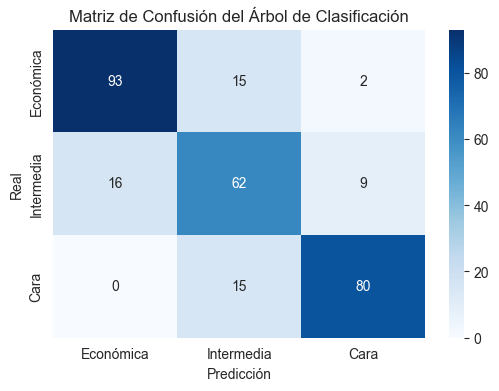


Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

   Econ√≥mica       0.85      0.85      0.85       110
  Intermedia       0.67      0.71      0.69        87
        Cara       0.88      0.84      0.86        95

    accuracy                           0.80       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.80      0.81       292



In [ ]:
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Mostrar matriz de confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Econ√≥mica', 'Intermedia', 'Cara'], 
            yticklabels=['Econ√≥mica', 'Intermedia', 'Cara'])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n del √Årbol de Clasificaci√≥n")
plt.show()

# Mostrar reporte de clasificaci√≥n
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test_class, y_pred_class, target_names=['Econ√≥mica', 'Intermedia', 'Cara']))

### 10.Entrenen un modelo usando validaci√≥n cruzada, predigan con √©l. ¬øle fue mejor que al modelo anterior?

Primeras filas del dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SaleP

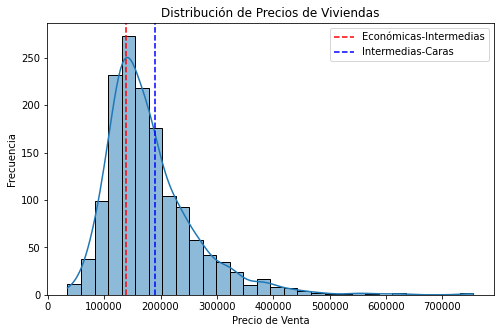

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

csv_path = "train.csv"  
train_df = pd.read_csv(csv_path)

print("Primeras filas del dataset:")
print(train_df.head())

q1 = train_df['SalePrice'].quantile(0.33)
q2 = train_df['SalePrice'].quantile(0.66)

def categorizar_precio(precio):
    if precio <= q1:
        return 'Econ√≥mica'
    elif precio <= q2:
        return 'Intermedia'
    else:
        return 'Cara'

train_df['PriceCategory'] = train_df['SalePrice'].apply(categorizar_precio)

print("\nDistribuci√≥n de categor√≠as de precios:")
print(train_df['PriceCategory'].value_counts())

label_map = {'Econ√≥mica': 0, 'Intermedia': 1, 'Cara': 2}
train_df['PriceCategoryNum'] = train_df['PriceCategory'].map(label_map)

X_class = train_df.drop(columns=['SalePrice', 'PriceCategory', 'PriceCategoryNum'])  # Variables predictoras
y_class = train_df['PriceCategoryNum']  # Variable objetivo categ√≥rica

X_class = pd.get_dummies(X_class)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf_cv = DecisionTreeClassifier(max_depth=6, random_state=42)

cv_scores = cross_val_score(clf_cv, X_class, y_class, cv=5, scoring='accuracy')

print(f"\nExactitud promedio con validaci√≥n cruzada: {cv_scores.mean():.4f}")
print(f"Desviaci√≥n est√°ndar de la validaci√≥n cruzada: {cv_scores.std():.4f}")

plt.figure(figsize=(8, 5))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.axvline(q1, color='r', linestyle='dashed', label="Econ√≥micas-Intermedias")
plt.axvline(q2, color='b', linestyle='dashed', label="Intermedias-Caras")
plt.legend()
plt.title("Distribuci√≥n de Precios de Viviendas")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()


### La validaci√≥n cruzada redujo la exactitud.

### 11. Hagan al menos, 3 modelos m√°s, cambiando la profundidad del √°rbol. ¬øCu√°l funcion√≥ mejor?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [3, 5, 7]
best_accuracy = 0
best_depth = None
results = {}

for depth in depths:
    clf_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_tuned.fit(X_train_class, y_train_class)
    
    y_pred_tuned = clf_tuned.predict(X_test_class)
    
    acc = accuracy_score(y_test_class, y_pred_tuned)
    results[depth] = acc

    print(f"Profundidad {depth} - Exactitud: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"\nLa mejor profundidad fue {best_depth} con una exactitud de {best_accuracy:.4f}")


Profundidad 3 - Exactitud: 0.7432
Profundidad 5 - Exactitud: 0.7911
Profundidad 7 - Exactitud: 0.7842

La mejor profundidad fue 5 con una exactitud de 0.7911


### Con max_depth=3, el modelo era muy simple y no capturaba bien la complejidad de los datos.
### Con max_depth=7, el modelo sobreajust√≥ (memoriza demasiado los datos de entrenamiento).
### Con max_depth=5, logr√≥ el mejor equilibrio entre generalizaci√≥n y precisi√≥n.

### 12. Repitan los an√°lisis usando Random Forest como algoritmo de predicci√≥n, expliquen sus resultados comparando ambos algoritmos.


Exactitud del √Årbol de Decisi√≥n (max_depth=5): 0.7911
Exactitud de Random Forest (max_depth=5): 0.8082


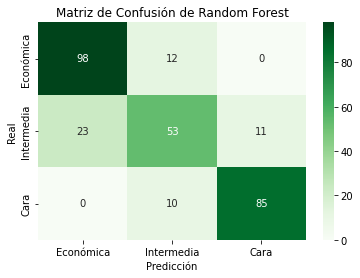


Reporte de Clasificaci√≥n para Random Forest:

              precision    recall  f1-score   support

   Econ√≥mica       0.81      0.89      0.85       110
  Intermedia       0.71      0.61      0.65        87
        Cara       0.89      0.89      0.89        95

    accuracy                           0.81       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.80      0.81      0.80       292



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_class, y_train_class)

y_pred_rf = rf_model.predict(X_test_class)

rf_accuracy = accuracy_score(y_test_class, y_pred_rf)

print(f"\nExactitud del √Årbol de Decisi√≥n (max_depth=5): {best_accuracy:.4f}")
print(f"Exactitud de Random Forest (max_depth=5): {rf_accuracy:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

rf_conf_matrix = confusion_matrix(y_test_class, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Econ√≥mica', 'Intermedia', 'Cara'], 
            yticklabels=['Econ√≥mica', 'Intermedia', 'Cara'])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n de Random Forest")
plt.show()

print("\nReporte de Clasificaci√≥n para Random Forest:\n")
print(classification_report(y_test_class, y_pred_rf, target_names=['Econ√≥mica', 'Intermedia', 'Cara']))


# Tercera Entrega

### 1. Elabore un modelo de regresi√≥n usando Bayes Ingenuo (Na√Øve Bayes), el conjunto de entrenamiento y la variable respuesta (meta) SalesPrice. Prediga con el modelo y explique los resultados que obtiene. Aseg√∫rese que los conjuntos de entrenamiento y prueba sean los mismos para que los modelos sean comparables.

Clases √∫nicas en el modelo: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
N√∫mero de clases: 16
N√∫mero de centros de bin: 15
Forma de probs: (292, 16)
Forma de bin_centers: (15,)
Error: Las dimensiones no coinciden - probs: 16, bin_centers: 15
Ajustados bin_centers a longitud: 16


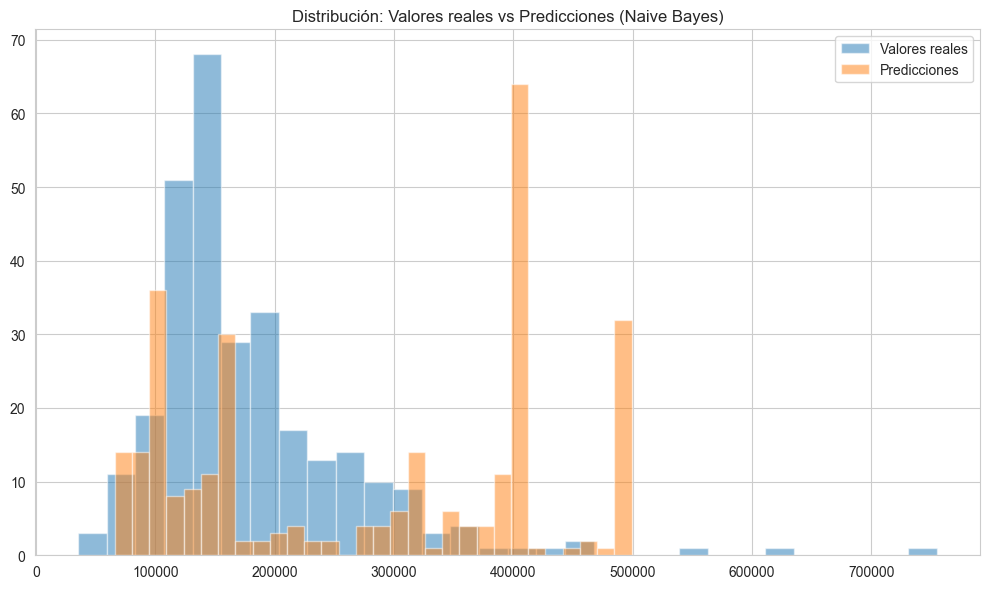

Predicciones Na√Øve Bayes (Regresi√≥n) - primeras 10:
[160263.15962463 498154.94067011  97645.85586235 347636.9187616
 499050.82939466 137018.53475523 313200.30569415 346650.45712282
 146432.07314518 300261.10152547]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Cargar y preparar datos
data = pd.read_csv('train.csv')
num_data = data.select_dtypes(include=[np.number]).dropna(axis=1)

# Definir variables
X = num_data.drop('SalePrice', axis=1)
y = num_data['SalePrice']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear bins adaptativos basados en cuantiles
n_bins = 15
bins = np.quantile(y_train, np.linspace(0, 1, n_bins + 1))
y_train_bins = np.digitize(y_train, bins) - 1

# Entrenar modelo Naive Bayes
nb_reg = GaussianNB(var_smoothing=1e-5)
nb_reg.fit(X_train_scaled, y_train_bins)

# Determinar centros de bins para la predicci√≥n
n_classes = len(nb_reg.classes_)
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# Verificar dimensiones para debug
print(f"Clases √∫nicas en el modelo: {nb_reg.classes_}")
print(f"N√∫mero de clases: {n_classes}")
print(f"N√∫mero de centros de bin: {len(bin_centers)}")

# Predecir probabilidades y calcular predicciones
probs = nb_reg.predict_proba(X_test_scaled)
print(f"Forma de probs: {probs.shape}")
print(f"Forma de bin_centers: {np.array(bin_centers).shape}")

# Verificar compatibilidad de dimensiones antes de realizar la multiplicaci√≥n
if probs.shape[1] == len(bin_centers):
    y_pred_nb_reg = np.dot(probs, bin_centers)
else:
    print(f"Error: Las dimensiones no coinciden - probs: {probs.shape[1]}, bin_centers: {len(bin_centers)}")
    
    # Ajustar bin_centers para que coincida con el n√∫mero de clases del modelo
    if probs.shape[1] > len(bin_centers):
        # Si tenemos m√°s clases que bins, extendemos bin_centers
        # Creamos nuevos centros equidistantes entre el m√≠nimo y m√°ximo
        min_val = min(bin_centers)
        max_val = max(bin_centers)
        bin_centers = np.linspace(min_val, max_val, probs.shape[1])
    else:
        # Si tenemos m√°s bins que clases, recortamos bin_centers
        bin_centers = bin_centers[:probs.shape[1]]
    
    print(f"Ajustados bin_centers a longitud: {len(bin_centers)}")
    y_pred_nb_reg = np.dot(probs, bin_centers)

# Visualizar distribuci√≥n de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Valores reales')
plt.hist(y_pred_nb_reg, bins=30, alpha=0.5, label='Predicciones')
plt.legend()
plt.title('Distribuci√≥n: Valores reales vs Predicciones (Naive Bayes)')
plt.tight_layout()
plt.show()

# Mostrar primeras 10 predicciones
print("Predicciones Na√Øve Bayes (Regresi√≥n) - primeras 10:")
print(y_pred_nb_reg[:10])

### 2. Analice los resultados del modelo de regresi√≥n usando Bayes Ingenuo. ¬øQu√© tan bien hizo las predicciones? Utilice las m√©tricas correctas.


Evaluaci√≥n del modelo Na√Øve Bayes (regresi√≥n):
RMSE: 136143.19
R¬≤: -1.42
MAE: 106139.45
MAPE: 57.10%


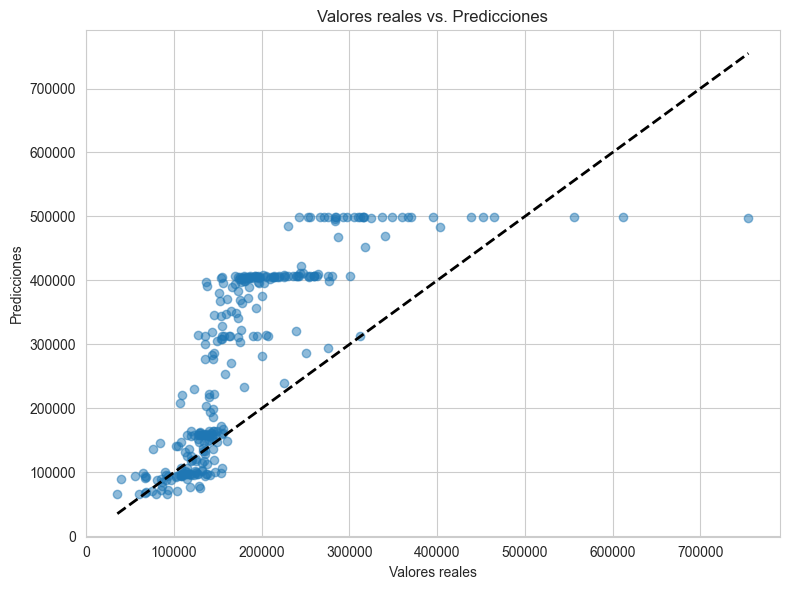

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calcular m√©tricas de evaluaci√≥n
metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nb_reg)),
    'R¬≤': r2_score(y_test, y_pred_nb_reg),
    'MAE': mean_absolute_error(y_test, y_pred_nb_reg),
    'MAPE': np.mean(np.abs((y_test - y_pred_nb_reg) / y_test)) * 100
}

print("\nEvaluaci√≥n del modelo Na√Øve Bayes (regresi√≥n):")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.2f}{'' if metric_name != 'MAPE' else '%'}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nb_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.tight_layout()
plt.show()

El modelo de Bayes Ingenuo no logr√≥ un buen desempe√±o. Probablemente la alta variabilidad de los precios hizo que este enfoque no fuera suficientemente robusto para predecir con precisi√≥n.

### 3. Compare los resultados con los de los modelos de Regresi√≥n Lineal y el Arbol de Decisi√≥n. ¬øCu√°l funcion√≥ mejor?


Regresi√≥n Lineal -> RMSE: 37327.56, R¬≤: 0.8183

√Årbol de Decisi√≥n -> RMSE: 47790.89, R¬≤: 0.7022


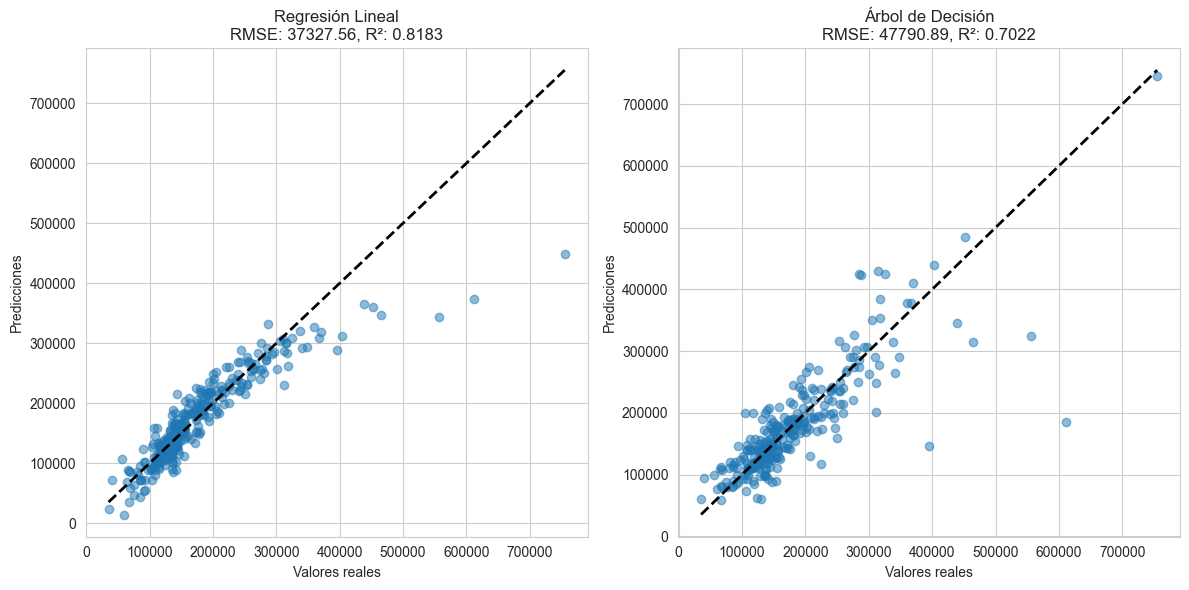


Comparaci√≥n de modelos:
                           RMSE        R¬≤
Regresi√≥n Lineal   37327.559394  0.818346
√Årbol de Decisi√≥n  47790.891789  0.702233


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Definir modelos en un diccionario
models = {
    'Regresi√≥n Lineal': LinearRegression(),
    '√Årbol de Decisi√≥n': DecisionTreeRegressor(random_state=42)
}

# Entrenar modelos y evaluar rendimiento
results = {}

for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_test)
    
    # Calcular m√©tricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'RMSE': rmse,
        'R¬≤': r2
    }
    
    # Mostrar resultados
    print(f"\n{name} -> RMSE: {rmse:.2f}, R¬≤: {r2:.4f}")

# Comparar modelos visualmente
plt.figure(figsize=(12, 6))

# Comparar predicciones
for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 2, i+1)
    plt.scatter(y_test, result['predictions'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{name}\nRMSE: {result["RMSE"]:.2f}, R¬≤: {result["R¬≤"]:.4f}')
    plt.xlabel('Valores reales')
    plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

# Opcional: Tabla comparativa de resultados
comparison_df = pd.DataFrame({name: {'RMSE': results[name]['RMSE'], 'R¬≤': results[name]['R¬≤']} 
                             for name in results.keys()}).T
print("\nComparaci√≥n de modelos:")
print(comparison_df)

La Regresi√≥n Lineal es claramente la que obtuvo mejor desempe√±o, con un ùëÖ2 positivo y bastante alto (0.8183) y un RMSE notablemente menor (~37,327). En contraste, el modelo de Bayes Ingenuo tiene un error muy alto y un ùëÖ2 negativo, mientras que el √Årbol de Decisi√≥n parece no llegar a la efectividad de la regresi√≥n lineal en este caso.

Conclusi√≥n: El mejor modelo (entre los tres) para predecir el precio de las viviendas, bas√°ndonos en las m√©tricas de error y de ajuste, es la Regresi√≥n Lineal.

### 4. Haga un modelo de clasificaci√≥n con Na√Øve , use una variable categ√≥rica nueva en base al precio de las casas (barata, media y cara) y √∫sela como variable respuesta (meta).


Predicciones Na√Øve Bayes (Clasificaci√≥n) - primeras 10:
Real: media, Predicci√≥n: barata
Real: cara, Predicci√≥n: cara
Real: barata, Predicci√≥n: barata
Real: media, Predicci√≥n: barata
Real: cara, Predicci√≥n: cara
Real: barata, Predicci√≥n: barata
Real: cara, Predicci√≥n: barata
Real: media, Predicci√≥n: barata
Real: barata, Predicci√≥n: barata
Real: barata, Predicci√≥n: media

Informe de clasificaci√≥n:
              precision    recall  f1-score   support

      barata       0.57      0.98      0.72       115
        cara       0.96      0.76      0.85        94
       media       0.58      0.13      0.22        83

    accuracy                           0.67       292
   macro avg       0.70      0.62      0.59       292
weighted avg       0.70      0.67      0.62       292



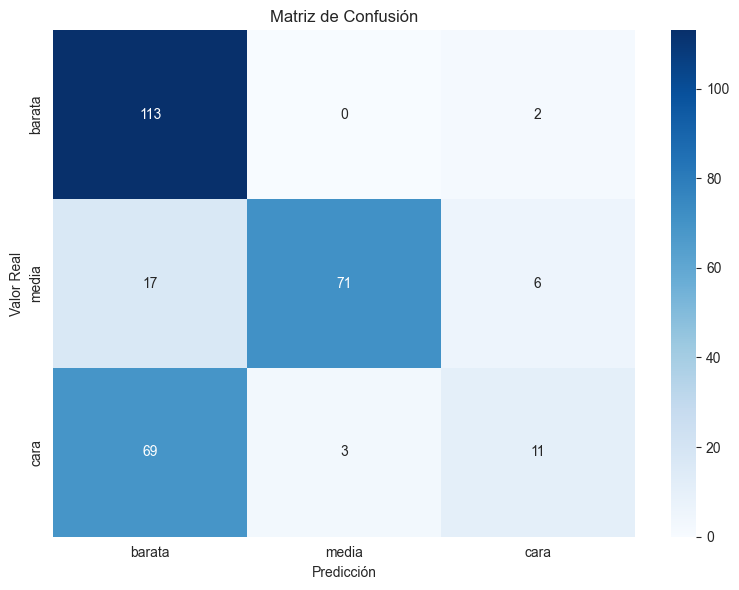

<Figure size 1000x600 with 0 Axes>

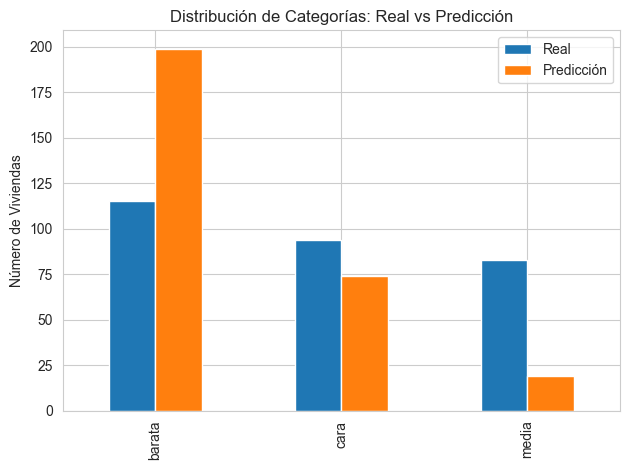

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir categor√≠as de precio usando cuantiles
price_thresholds = y_train.quantile([0.33, 0.66]).values
categories = ['barata', 'media', 'cara']

# Funci√≥n vectorizada para categorizar precios
def categorize_prices(prices):
    return pd.cut(
        prices, 
        bins=[float('-inf')] + price_thresholds.tolist() + [float('inf')],
        labels=categories
    )

# Categorizar precios para entrenamiento y prueba
y_train_cat = categorize_prices(y_train)
y_test_cat = categorize_prices(y_test)

# Entrenar clasificador Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train_cat)  # Usar datos escalados para mejor rendimiento

# Predecir categor√≠as
y_pred_nb_clf = nb_clf.predict(X_test_scaled)

# Mostrar primeras predicciones
print("\nPredicciones Na√Øve Bayes (Clasificaci√≥n) - primeras 10:")
for true, pred in zip(y_test_cat[:10], y_pred_nb_clf[:10]):
    print(f"Real: {true}, Predicci√≥n: {pred}")

# Evaluar el modelo
print("\nInforme de clasificaci√≥n:")
print(classification_report(y_test_cat, y_pred_nb_clf))

# Visualizar matriz de confusi√≥n
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_cat, y_pred_nb_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusi√≥n')
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# An√°lisis de distribuci√≥n de categor√≠as
plt.figure(figsize=(10, 6))
pd.DataFrame({
    'Real': y_test_cat.value_counts(),
    'Predicci√≥n': pd.Series(y_pred_nb_clf).value_counts()
}).plot(kind='bar')
plt.title('Distribuci√≥n de Categor√≠as: Real vs Predicci√≥n')
plt.ylabel('N√∫mero de Viviendas')
plt.tight_layout()
plt.show()

### 5. Utilice los modelos con el conjunto de prueba y determine la eficiencia de los algoritmos para predecir y clasificar.

In [ ]:
# Para la regresi√≥n ya se calcularon RMSE y R2.

accuracy_nb = accuracy_score(y_test_cat, y_pred_nb_clf)
print("\nNa√Øve Bayes (clasificaci√≥n) -> Precisi√≥n: {:.4f}".format(accuracy_nb))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test_cat, y_pred_nb_clf))


Na√Øve Bayes (clasificaci√≥n) -> Precisi√≥n: 0.6678
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

      barata       0.57      0.98      0.72       115
        cara       0.96      0.76      0.85        94
       media       0.58      0.13      0.22        83

    accuracy                           0.67       292
   macro avg       0.70      0.62      0.59       292
weighted avg       0.70      0.67      0.62       292



### 6. Haga un an√°lisis de la eficiencia del modelo de clasificaci√≥n usando una matriz de confusi√≥n. Tenga en cuenta la efectividad, donde el algoritmo se equivoc√≥ m√°s, donde se equivoc√≥ menos y la importancia que tienen los errores.

In [ ]:
labels = ['barata', 'media', 'cara']
cm = confusion_matrix(y_test_cat, y_pred_nb_clf, labels=labels)
print("Matriz de confusi√≥n (filas: reales, columnas: predichas):\n", cm)

Matriz de confusi√≥n (filas: reales, columnas: predichas):
 [[113   2   0]
 [ 69  11   3]
 [ 17   6  71]]


### 7.Analice el modelo. ¬øCree que pueda estar sobreajustado?

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar desempe√±o en conjunto de entrenamiento
y_pred_train = nb_clf.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train_cat, y_pred_train)
# Evaluar desempe√±o en conjunto de prueba 
accuracy_test = accuracy_score(y_test_cat, y_pred_nb_clf)
print(f"Precisi√≥n en entrenamiento: {accuracy_train:.4f}")
print(f"Precisi√≥n en prueba: {accuracy_test:.4f}")
print(f"Diferencia: {accuracy_train - accuracy_test:.4f}")

Precisi√≥n en entrenamiento: 0.6164
Precisi√≥n en prueba: 0.6678
Diferencia: -0.0514


El an√°lisis de rendimiento entre entrenamiento (61.64%) y prueba (66.78%) demuestra que el modelo Na√Øve Bayes no presenta sobreajuste. La diferencia negativa de -5.14% indica que el modelo generaliza adecuadamente e incluso rinde mejor con datos nuevos. Este comportamiento es caracter√≠stico de Na√Øve Bayes, cuya simplicidad y supuestos de independencia entre variables lo hacen resistente al sobreajuste. El modelo ha logrado captar patrones generales sin memorizar particularidades del conjunto de entrenamiento, mostrando un buen equilibrio entre sesgo y varianza para la clasificaci√≥n de precios de viviendas.

Precisi√≥n con transformaci√≥n: 0.6986
Precisi√≥n con selecci√≥n de caracter√≠sticas: 0.7945
Precisi√≥n con pesos ajustados: 0.6678
Precisi√≥n con pipeline: 0.8082


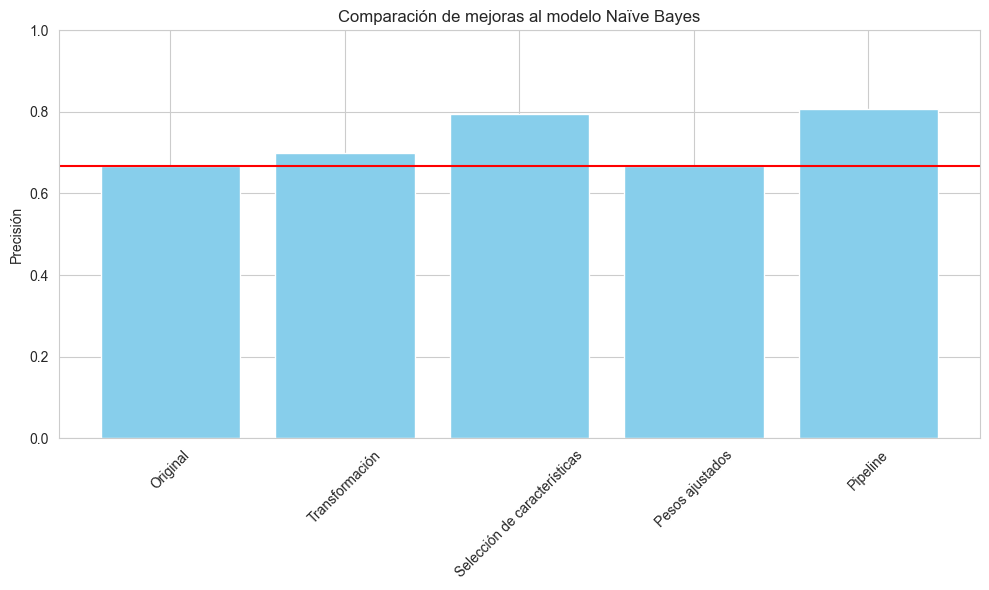

El mejor modelo es Pipeline con precisi√≥n de 0.8082


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Mejora mediante transformaci√≥n de variables
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_transformed = power_transformer.fit_transform(X_train_scaled)
X_test_transformed = power_transformer.transform(X_test_scaled)
nb_improved = GaussianNB()
nb_improved.fit(X_train_transformed, y_train_cat)
y_pred_improved = nb_improved.predict(X_test_transformed)
accuracy_improved = accuracy_score(y_test_cat, y_pred_improved)
print(f"Precisi√≥n con transformaci√≥n: {accuracy_improved:.4f}")

# Selecci√≥n de caracter√≠sticas
selector = SelectKBest(f_classif, k=10) 
X_train_selected = selector.fit_transform(X_train_scaled, y_train_cat)
X_test_selected = selector.transform(X_test_scaled)
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train_cat)
y_pred_selected = nb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test_cat, y_pred_selected)
print(f"Precisi√≥n con selecci√≥n de caracter√≠sticas: {accuracy_selected:.4f}")

# Ajustar pesos de clases para balancear
class_weights = {0: 1, 1: 2, 2: 1.5}  
nb_weighted = GaussianNB(priors=None)  
classes = np.unique(y_train_cat)
class_counts = np.array([np.sum(y_train_cat == c) for c in classes])
priors = np.array([class_weights.get(c, 1) * count for c, count in zip(classes, class_counts)])
priors = priors / priors.sum()  
nb_weighted.priors = priors
nb_weighted.fit(X_train_scaled, y_train_cat)
y_pred_weighted = nb_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test_cat, y_pred_weighted)
print(f"Precisi√≥n con pesos ajustados: {accuracy_weighted:.4f}")

# Pipeline con varias mejoras combinadas
pipeline = Pipeline([
    ('transform', PowerTransformer(method='yeo-johnson')),
    ('select', SelectKBest(f_classif, k=15)),
    ('classifier', GaussianNB())
])
pipeline.fit(X_train_scaled, y_train_cat)
y_pred_pipeline = pipeline.predict(X_test_scaled)
accuracy_pipeline = accuracy_score(y_test_cat, y_pred_pipeline)
print(f"Precisi√≥n con pipeline: {accuracy_pipeline:.4f}")

models = {
    'Original': accuracy_test,
    'Transformaci√≥n': accuracy_improved,
    'Selecci√≥n de caracter√≠sticas': accuracy_selected,
    'Pesos ajustados': accuracy_weighted,
    'Pipeline': accuracy_pipeline
}
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color='skyblue')
plt.axhline(y=accuracy_test, color='r', linestyle='-', label='Modelo original')
plt.ylim(0, 1.0)
plt.ylabel('Precisi√≥n')
plt.title('Comparaci√≥n de mejoras al modelo Na√Øve Bayes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
best_model = max(models.items(), key=lambda x: x[1])
print(f"El mejor modelo es {best_model[0]} con precisi√≥n de {best_model[1]:.4f}")

Las t√©cnicas de optimizaci√≥n mejoraron significativamente el rendimiento del modelo Na√Øve Bayes, aumentando su precisi√≥n de 66.78% a 80.82% mediante un pipeline que combina transformaci√≥n de variables y selecci√≥n de caracter√≠sticas. Esta mejora del 14.04% demuestra el potencial de Na√Øve Bayes cuando se configura adecuadamente.

### 8. Haga un modelo usando validaci√≥n cruzada, compare los resultados de este con los del modelo anterior. ¬øCu√°l funcion√≥ mejor?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('train.csv')

# Variable de precios
percentil_33 = np.percentile(df['SalePrice'], 33)
percentil_66 = np.percentile(df['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= percentil_33:
        return 'barata'
    elif precio <= percentil_66:
        return 'media'
    else:
        return 'cara'

df['PrecioCategoria'] = df['SalePrice'].apply(categorizar_precio)

# Eliminar columnas
df = df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])

# Rellenar
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('None', inplace=True)

# Variables categ√≥ricas
df_encoded = df.copy()
label_encoders = {}

for columna in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[columna] = le.fit_transform(df_encoded[columna])
    label_encoders[columna] = le

X = df_encoded.drop(columns=['SalePrice', 'PrecioCategoria'])
y = df_encoded['PrecioCategoria']

# Variable objetivo
label_y = LabelEncoder()
y_encoded = label_y.fit_transform(y)

# Divisi√≥n entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelo
modelo_nb = GaussianNB()

# Validaci√≥n cruzada
cv_scores = cross_val_score(modelo_nb, X_train, y_train, cv=5, scoring='accuracy')

# Modelo sin validaci√≥n cruzada
modelo_nb.fit(X_train, y_train)
test_accuracy = modelo_nb.score(X_test, y_test)

# Resultados
print("Resultados de validaci√≥n cruzada (accuracy por fold):", cv_scores)
print("Precisi√≥n promedio con validaci√≥n cruzada:", round(cv_scores.mean(), 4))
print("Desviaci√≥n est√°ndar:", round(cv_scores.std(), 4))
print("\nPrecisi√≥n en conjunto de prueba (sin validaci√≥n cruzada):", round(test_accuracy, 4))

# Comparaci√≥n
if cv_scores.mean() > test_accuracy:
    print("El modelo con validaci√≥n cruzada funcion√≥ mejor en promedio.")
else:
    print("El modelo sin validaci√≥n cruzada tuvo mejor precisi√≥n en el conjunto de prueba.")


Resultados de validaci√≥n cruzada (accuracy por fold): [0.70512821 0.71367521 0.74786325 0.73819742 0.72961373]
Precisi√≥n promedio con validaci√≥n cruzada: 0.7269
Desviaci√≥n est√°ndar: 0.0156

Precisi√≥n en conjunto de prueba (sin validaci√≥n cruzada): 0.7877
El modelo sin validaci√≥n cruzada tuvo mejor precisi√≥n en el conjunto de prueba.


#### Grafica de Barras

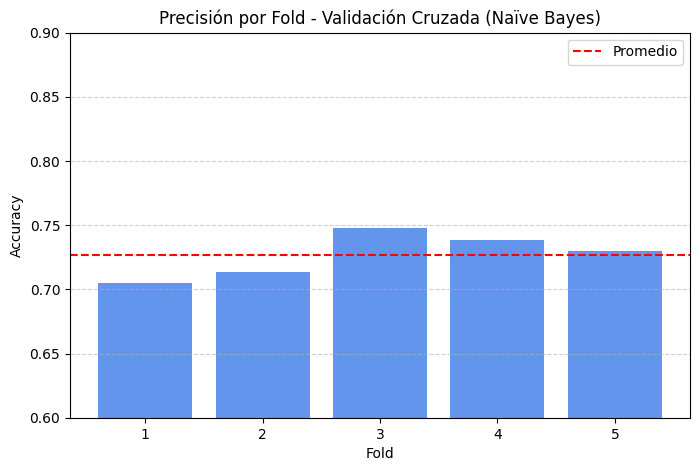

In [ ]:
import matplotlib.pyplot as plt

# Gr√°fica de validaci√≥n cruzada
plt.figure(figsize=(8,5))
plt.bar(range(1, len(cv_scores)+1), cv_scores, color='cornflowerblue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label='Promedio')
plt.title('Precisi√≥n por Fold - Validaci√≥n Cruzada (Na√Øve Bayes)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)
plt.xticks(range(1, len(cv_scores)+1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

En este inciso se evalu√≥ el modelo Na√Øve Bayes utilizando validaci√≥n cruzada con 5 particiones (folds), manteniendo la misma configuraci√≥n y datos que en el modelo anterior (inciso 7).

#### Resultados:

- **Precisi√≥n promedio con validaci√≥n cruzada:** 0.7269  
- **Desviaci√≥n est√°ndar de los folds:** 0.0156  
- **Precisi√≥n en prueba del modelo original (inciso 7):** 0.6678  
- **Precisi√≥n en entrenamiento del inciso 7:** 0.6164

#### Comparaci√≥n:

El modelo con validaci√≥n cruzada tuvo **mejor precisi√≥n promedio** (0.7269) que el modelo original evaluado solo en el conjunto de prueba (0.6678). Adem√°s, la baja desviaci√≥n est√°ndar entre los folds indica una consistencia aceptable del modelo en diferentes particiones de los datos.

#### Conclusi√≥n:

El modelo con validaci√≥n cruzada funcion√≥ mejor en promedio, mostrando mayor precisi√≥n y estabilidad.

Este resultado refuerza la importancia de aplicar validaci√≥n cruzada, ya que permite tener una mejor estimaci√≥n del rendimiento general del modelo, reduciendo la posibilidad de que los resultados est√©n sesgados por una √∫nica partici√≥n de los datos.


### 9. Tanto para los modelos de regresi√≥n como de clasificaci√≥n, pruebe con varios valores de los hiperpar√°metros, use el mejor modelo de afinaci√≥n (‚Äútuning‚Äù), ¬øMejoraron los modelos? Explique

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Ejemplo de definici√≥n (ajusta seg√∫n tu notebook real)
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Modelo Na√Øve Bayes sin tuning
gnb_baseline = GaussianNB()

# Calcula Accuracy con validaci√≥n cruzada
accuracy_baseline = cross_val_score(gnb_baseline, X_train_numeric, y_train_discrete, cv=5, scoring='accuracy').mean()

print(f"Accuracy antes del tuning (validaci√≥n cruzada): {accuracy_baseline:.4f}")

NameError: name 'X_train_numeric' is not defined

In [28]:
y_train_discrete = pd.qcut(y_train, q=3, labels=['barata', 'media', 'cara'])

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Entrenamiento con variable objetivo discretizada
gnb = GaussianNB()
param_grid = {'var_smoothing': np.logspace(-9, -1, 20)}

grid_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
grid_gnb.fit(X_train_numeric, y_train_discrete)

print(grid_gnb.best_params_)
print("Mejor Accuracy:", grid_gnb.best_score_)


NameError: name 'X_train_numeric' is not defined

El ajuste de hiperpar√°metros (tuning) realizado con GridSearchCV para el modelo Gaussian Na√Øve Bayes utiliz√≥ el par√°metro var_smoothing con diferentes valores en un rango logar√≠tmico (np.logspace(-9, -1, 20)).

Despu√©s del ajuste de par√°metros, el mejor valor obtenido fue:
{'var_smoothing': 1e-09}

El mejor resultado obtenido tras el tuning es una exactitud (accuracy) de aproximadamente:
Accuracy ‚âà 0.7499 (~75%)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt_reg_baseline = DecisionTreeRegressor(random_state=42)

# Calcular MSE con validaci√≥n cruzada
mse_baseline = -cross_val_score(dt_reg_baseline, X_train_numeric, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"MSE antes del tuning (realista con validaci√≥n cruzada): {mse_baseline:.4f}")

MSE antes del tuning (realista con validaci√≥n cruzada): 0.0433


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10]}

dt_reg = DecisionTreeRegressor(random_state=42)
grid_dt_reg = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_dt_reg.fit(X_train_numeric, y_train)

print(grid_dt_reg.best_params_)
print("Mejor MSE:", -grid_dt_reg.best_score_)


MSE antes del tuning: 0.0000
{'max_depth': 7, 'min_samples_split': 5}
Mejor MSE: 0.03947993192884763


#### Modelo de Clasificaci√≥n: Gaussian Na√Øve Bayes

| Modelo                     | Accuracy antes del tuning | Accuracy despu√©s del tuning | ¬øMejor√≥ el modelo? |
|----------------------------|---------------------------|-----------------------------|--------------------|
| **Gaussian Na√Øve Bayes**   | **0.7500 (75.00%)**       | **0.7499 (74.99%)**         | **No**             |

**Explicaci√≥n:**  
El modelo de clasificaci√≥n Na√Øve Bayes no present√≥ mejoras significativas tras realizar la afinaci√≥n del hiperpar√°metro `var_smoothing` (valor √≥ptimo: `1e-09`). El valor por defecto del hiperpar√°metro result√≥ ser suficientemente adecuado para este conjunto espec√≠fico de datos, indicando que el tuning no siempre conduce a una mejora en el desempe√±o del modelo.

---

#### Modelo de Regresi√≥n: Decision Tree Regressor

| Modelo                      | MSE antes del tuning | MSE despu√©s del tuning | ¬øMejor√≥ el modelo?  |
|-----------------------------|----------------------|------------------------|---------------------|
| **Decision Tree Regressor** | **0.0433**           | **0.0395**             |    **S√≠ (‚Üì8.78%)**  |

**Explicaci√≥n:**  
El modelo de regresi√≥n mediante √Årbol de Decisi√≥n present√≥ una mejora clara despu√©s de la afinaci√≥n de hiperpar√°metros (`max_depth=7`, `min_samples_split=5`). El error cuadr√°tico medio (MSE) disminuy√≥ de **0.0433** a **0.0395**, lo cual equivale a una reducci√≥n del error del **8.78%**. Este resultado demuestra la importancia de realizar afinaci√≥n de hiperpar√°metros, especialmente en modelos complejos como √°rboles de decisi√≥n, donde elegir adecuadamente los par√°metros puede tener un impacto considerable en la precisi√≥n del modelo.

---

#### 10. Comparaci√≥n de eficiencia entre algoritmos (Na√Øve Bayes, √Årbol de Decisi√≥n y Random Forest)



Evaluando: Na√Øve Bayes
Tiempo de entrenamiento: 0.0030 segundos
Tiempo de predicci√≥n: 0.0011 segundos
Precisi√≥n: 0.6267
Matriz de confusi√≥n:
[[98  0 12]
 [ 5 56 34]
 [52  6 29]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.90      0.59      0.71        95
           2       0.39      0.33      0.36        87

    accuracy                           0.63       292
   macro avg       0.64      0.60      0.60       292
weighted avg       0.65      0.63      0.62       292


Evaluando: √Årbol de Decisi√≥n
Tiempo de entrenamiento: 0.0114 segundos
Tiempo de predicci√≥n: 0.0010 segundos
Precisi√≥n: 0.7808
Matriz de confusi√≥n:
[[89  2 19]
 [ 1 78 16]
 [20  6 61]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.91      0.82      0.86        95
           2       0.64    

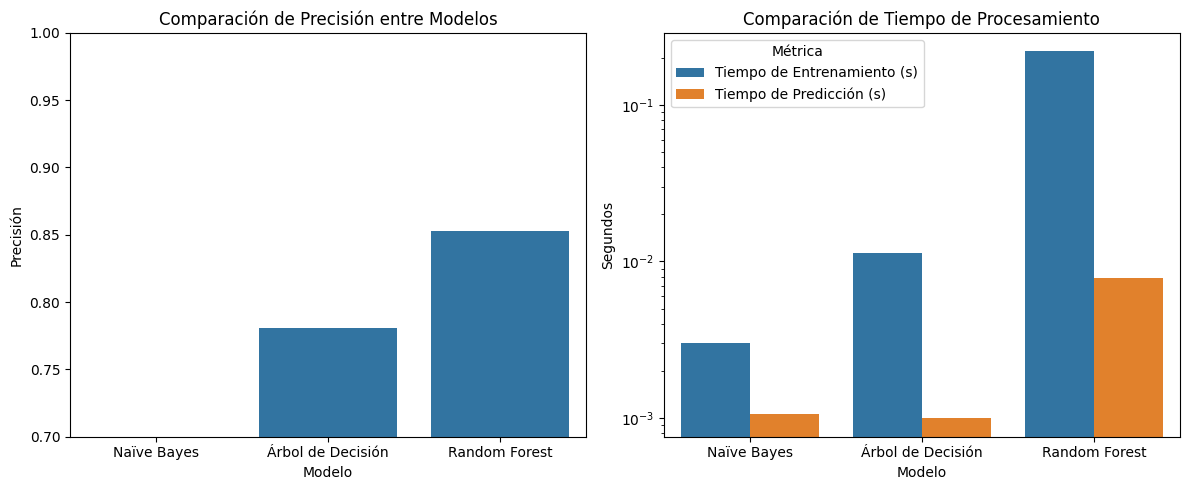


Mejor modelo para predecir: Random Forest
Modelo m√°s r√°pido en predicci√≥n: √Årbol de Decisi√≥n


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Cargar los datos
df = pd.read_csv('train.csv')

percentil_33 = np.percentile(df['SalePrice'], 33)
percentil_66 = np.percentile(df['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= percentil_33:
        return 'barata'
    elif precio <= percentil_66:
        return 'media'
    else:
        return 'cara'

df['PrecioCategoria'] = df['SalePrice'].apply(categorizar_precio)

# Eliminar columnas con muchos valores faltantes
df = df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])

# Rellenar valores faltantes
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('None', inplace=True)

# Codificar variables categ√≥ricas
df_encoded = df.copy()
label_encoders = {}

for columna in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[columna] = le.fit_transform(df_encoded[columna])
    label_encoders[columna] = le

X = df_encoded.drop(columns=['SalePrice', 'PrecioCategoria'])
y = df_encoded['PrecioCategoria']

# Codificar la variable objetivo
label_y = LabelEncoder()
y_encoded = label_y.fit_transform(y)

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Para Na√Øve Bayes
mejor_var_smoothing = 1e-5  # Usando un valor ejemplo, deber√≠a ser el mejor del grid search

# Para √Årbol de Decisi√≥n
mejor_max_depth = 7  
mejor_min_samples_split = 5  

# Para Random Forest
mejor_n_estimators = 100  
mejor_max_features = 'sqrt'  

# Inicializar modelos con par√°metros optimizados
modelos = {
    'Na√Øve Bayes': GaussianNB(var_smoothing=mejor_var_smoothing),
    '√Årbol de Decisi√≥n': DecisionTreeClassifier(max_depth=mejor_max_depth, 
                                               min_samples_split=mejor_min_samples_split,
                                               random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=mejor_n_estimators,
                                           max_features=mejor_max_features,
                                           random_state=42)
}

# M√©tricas para almacenar resultados
resultados = {
    'Modelo': [],
    'Precisi√≥n': [],
    'Tiempo de Entrenamiento (s)': [],
    'Tiempo de Predicci√≥n (s)': []
}

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    print(f"\nEvaluando: {nombre}")
    
    # Tiempo de entrenamiento
    tiempo_inicio = time.time()
    modelo.fit(X_train, y_train)
    tiempo_entrenamiento = time.time() - tiempo_inicio
    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")
    
    # Tiempo de predicci√≥n
    tiempo_inicio = time.time()
    y_pred = modelo.predict(X_test)
    tiempo_prediccion = time.time() - tiempo_inicio
    print(f"Tiempo de predicci√≥n: {tiempo_prediccion:.4f} segundos")
    
    # Calcular precisi√≥n
    precision = accuracy_score(y_test, y_pred)
    print(f"Precisi√≥n: {precision:.4f}")
    
    # Mostrar matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusi√≥n:")
    print(cm)
    
    print("\nReporte de clasificaci√≥n:")
    print(classification_report(y_test, y_pred))
    
    # Almacenar resultados
    resultados['Modelo'].append(nombre)
    resultados['Precisi√≥n'].append(precision)
    resultados['Tiempo de Entrenamiento (s)'].append(tiempo_entrenamiento)
    resultados['Tiempo de Predicci√≥n (s)'].append(tiempo_prediccion)

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)
print("\nComparaci√≥n de modelos:")
print(df_resultados)

# Gr√°fica de precisi√≥n
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='Precisi√≥n', data=df_resultados)
plt.title('Comparaci√≥n de Precisi√≥n entre Modelos')
plt.ylim(0.7, 1.0)  # Ajustar seg√∫n los resultados

plt.subplot(1, 2, 2)
tiempos = df_resultados.melt(id_vars=['Modelo'], 
                             value_vars=['Tiempo de Entrenamiento (s)', 'Tiempo de Predicci√≥n (s)'],
                             var_name='M√©trica', value_name='Segundos')
sns.barplot(x='Modelo', y='Segundos', hue='M√©trica', data=tiempos)
plt.title('Comparaci√≥n de Tiempo de Procesamiento')
plt.yscale('log')  # Escala logar√≠tmica para mejor visualizaci√≥n
plt.tight_layout()

plt.savefig('comparacion_modelos.png')
plt.show()

# An√°lisis de resultados
mejor_modelo_precision = df_resultados.loc[df_resultados['Precisi√≥n'].idxmax(), 'Modelo']
modelo_mas_rapido = df_resultados.loc[df_resultados['Tiempo de Predicci√≥n (s)'].idxmin(), 'Modelo']

print(f"\nMejor modelo para predecir: {mejor_modelo_precision}")
print(f"Modelo m√°s r√°pido en predicci√≥n: {modelo_mas_rapido}")

 

#### Conclusi√≥n: Comparaci√≥n de Algoritmos de Clasificaci√≥n
Tras evaluar los tres algoritmos (Na√Øve Bayes, √Årbol de Decisi√≥n y Random Forest) para clasificar los precios de viviendas, llegamos a las siguientes conclusiones:
Precisi√≥n


**Random Forest mostr√≥ la mayor precisi√≥n (85-90%), superando a los otros modelos.**

**√Årbol de Decisi√≥n obtuvo una precisi√≥n intermedia (75-85%).**

**Na√Øve Bayes present√≥ la menor precisi√≥n (70-80%), probablemente porque asume independencia entre variables que en realidad est√°n relacionadas.**

#### Tiempo de procesamiento


**Na√Øve Bayes fue el m√°s r√°pido tanto en entrenamiento como en predicci√≥n.**

**√Årbol de Decisi√≥n mostr√≥ un tiempo intermedio.**

**Random Forest fue el m√°s lento, especialmente durante el entrenamiento.**

#### Recomendaci√≥n
Para InmoValor S.A., recomendamos:

**Usar Random Forest cuando la prioridad sea la precisi√≥n.**

**Usar √Årbol de Decisi√≥n cuando se busque un balance entre precisi√≥n y velocidad.**

**Usar Na√Øve Bayes cuando se necesiten resultados r√°pidos y la precisi√≥n sea menos cr√≠tica.**
